In [1]:
import musicae.scripts.default_path as paths
import musicae.scripts.overall_scripts as scr
import musicae.scripts.load_or_save as load_or_save
import musicae.neural_nets_utils as nn_utils
import musicae.autosimilarity_segmentation as as_seg
import musicae.data_manipulation as dm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


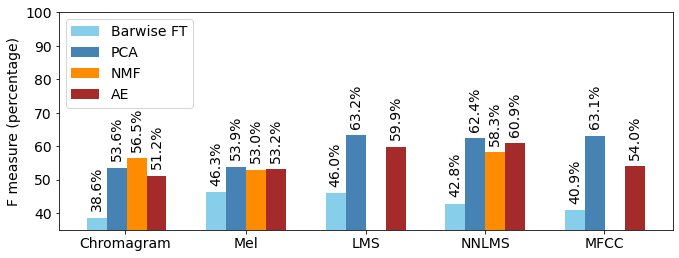

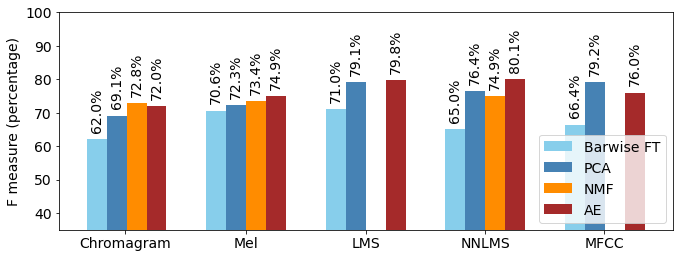

NameError: name 'stop' is not defined

In [21]:
f_mes_bfeat_zerofive = [38.6,46.3,46,42.8,40.9]
f_mes_bfeat_three = [62,70.6,71,65,66.4]

f_mes_pca_zerofive = [53.6,53.9,63.2,62.4,63.1]
f_mes_pca_three = [69.1,72.3,79.1,76.4,79.2]

f_mes_nmf_zerofive = [56.5,53,0,58.3,0]
f_mes_nmf_three = [72.8,73.4,0,74.9,0]

f_mes_ae_zerofive = [51.2,53.2,59.9,60.9,54]
f_mes_ae_three = [72,74.9,79.8,80.1,76]

bfeat = []
pca = []
nmf = []
ae = []
big_zerofive = []
big_three = []

for i in range(5):
    big_zerofive.append(f_mes_bfeat_zerofive[i])
    big_three.append(f_mes_bfeat_three[i])
    bfeat.append(i * 4)
    big_zerofive.append(f_mes_pca_zerofive[i])
    big_three.append(f_mes_pca_three[i])
    pca.append(i * 4 + 1)
    big_zerofive.append(f_mes_nmf_zerofive[i])
    big_three.append(f_mes_nmf_three[i])
    nmf.append(i * 4 + 2)
    big_zerofive.append(f_mes_ae_zerofive[i])
    big_three.append(f_mes_ae_three[i])
    ae.append(i * 4 + 3)


subaxis = ["Barwise FT","PCA","NMF","AE"]
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(1, 1, figsize=(11,4))
ax.set_ylim( 35, 100 )
a = ax.bar([0,1.5,3, 4.5, 6], np.array(big_zerofive)[bfeat], color='skyblue', width=0.25)
b = ax.bar([0.25,1.75,3.25, 4.75, 6.25], np.array(big_zerofive)[pca], color='steelblue', width=0.25)
#c = ax.bar([0.5,2,3.5], np.array(big_zerofive)[nnae], color='skyblue', width=0.25,hatch='//')
#d = ax.bar([0.75,2.25,3.75], np.array(big_zerofive)[nnsae], color='steelblue', width=0.25,hatch='//')
c = ax.bar([0.5,2,3.5, 5, 6.5], np.array(big_zerofive)[nmf], color='darkorange', width=0.25)
d = ax.bar([0.75,2.25,3.75, 5.25, 6.75], np.array(big_zerofive)[ae], color='brown', width=0.25)

ax.set_xticks([0.36,1.87,3.38, 4.875,6.37])
ax.set_xticklabels(['Chromagram','Mel','LMS', 'NNLMS', 'MFCC'])
ax.legend(labels=subaxis, loc='upper left')
ax.set_ylabel("F measure (percentage)")
#ax.set_title("F measure, with 0.5 seconds tolerance")

#width_idx = [-1.15,-1.1,-1.06,-1.01,-0.785,-0.735,-0.685,-0.64,-0.42,-0.37,-0.32,-0.28]
#for idx, w_idx in enumerate(width_idx):
#    plt.text(w_idx,big_zerofive[idx]/100 - 0.04,f"{big_zerofive[idx]}%", rotation = 90)

for rect in a + b + c + d:
    height = rect.get_height()
    if height >1:
        plt.text(rect.get_x() + rect.get_width()/2.0, height + 2, f"{height}%", ha='center', va='bottom', rotation = 90)
    
fig.savefig("C:/Users/amarmore/Desktop/Mes papiers/Publiés/SMC22/Barwise compression/Camera Ready/figs/results_barcomp_05.pdf", bbox_inches = "tight")#, format='png')

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(11,4))
ax.set_ylim( 35,100 )
b_1 = ax.bar([0,1.5,3, 4.5, 6], np.array(big_three)[bfeat], color='skyblue', width=0.25)
b_2 = ax.bar([0.25,1.75,3.25, 4.75, 6.25], np.array(big_three)[pca], color='steelblue', width=0.25)
#c = ax.bar([0.5,2,3.5], np.array(big_zerofive)[nnae], color='skyblue', width=0.25,hatch='//')
#d = ax.bar([0.75,2.25,3.75], np.array(big_zerofive)[nnsae], color='steelblue', width=0.25,hatch='//')
b_3 = ax.bar([0.5,2,3.5, 5, 6.5], np.array(big_three)[nmf], color='darkorange', width=0.25)
b_4 = ax.bar([0.75,2.25,3.75, 5.25, 6.75], np.array(big_three)[ae], color='brown', width=0.25)

ax.set_xticks([0.36,1.87,3.38, 4.875,6.37])
ax.set_xticklabels(['Chromagram','Mel','LMS', 'NNLMS', 'MFCC'])
ax.legend(labels=subaxis, loc='lower right')
ax.set_ylabel("F measure (percentage)")
#ax.set_title("F measure, with 0.5 seconds tolerance")


for rect in b_1 + b_2 + b_3 + b_4:
    height = rect.get_height()
    if height >1:
        plt.text(rect.get_x() + rect.get_width()/2.0, height + 2, f"{height}%", ha='center', va='bottom', rotation = 90)
fig.savefig("C:/Users/amarmore/Desktop/Mes papiers/Publiés/SMC22/Barwise compression/Camera Ready/figs/results_barcomp_3.pdf", bbox_inches = "tight")#, format='png')
plt.show()
stop

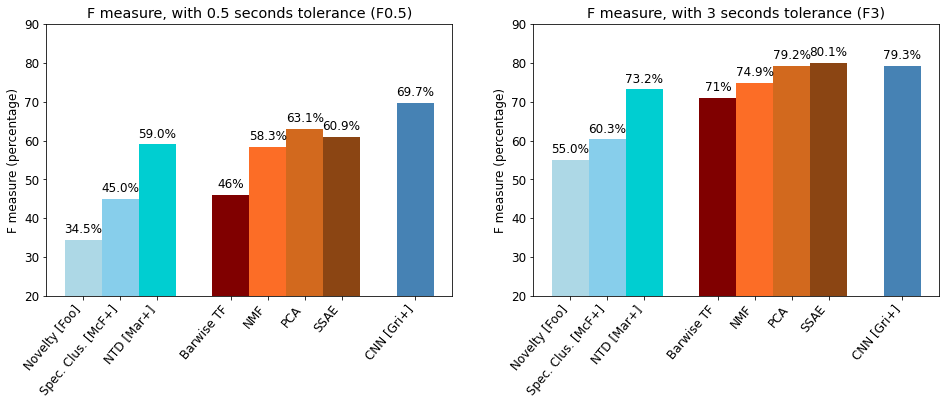

In [41]:
width = 0.5
plt.rcParams.update({'font.size': 12})

# Baselines
baseline_f_mes_zero_five = [34.5,45.0,59.0,69.7]
baseline_f_mes_three = [55.0,60.3,73.2,79.3]

colors_baselines = ['lightblue','skyblue','darkturquoise','steelblue'] #deepskyblue
algos_baselines = ['Novelty [Foo]','Spec. Clus. [McF+]','NTD [Mar+]','CNN [Gri+]']

indexes_baselines = [i * width for i in range(len(algos_baselines))]
indexes_baselines[-1] = indexes_baselines[-2] + 7 * width

fig, ax = plt.subplots(1, 2, figsize=(16,5))
for idx_x, x in enumerate(indexes_baselines):
    height = np.array(baseline_f_mes_zero_five)[idx_x]
    ax[0].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[0].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)
    
    height = np.array(baseline_f_mes_three)[idx_x]
    ax[1].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[1].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)

indexes = [i for i in indexes_baselines]
algos = [i for i in algos_baselines]


# CBM
color_CBM = ['maroon', '#FC6D26','chocolate','saddlebrown']
algos.append("Barwise TF")
idx_cbm_pcp = indexes_baselines[-2] + 2 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [46, 71]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

idx_cbm_ntd = idx_cbm_pcp + width
algos.append("NMF")
indexes.append(idx_cbm_ntd)
f_mes_cbm_ntd = [58.3,74.9]
ax[0].bar(idx_cbm_ntd, f_mes_cbm_ntd[0], color=color_CBM[1], width=width)
ax[0].text(idx_cbm_ntd,f_mes_cbm_ntd[0] + 1, f"{f_mes_cbm_ntd[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_ntd, f_mes_cbm_ntd[1], color=color_CBM[1], width=width)
ax[1].text(idx_cbm_ntd,f_mes_cbm_ntd[1] + 1, f"{f_mes_cbm_ntd[1]}%", ha='center', va='bottom', rotation = 0)
    
idx_cbm_pca = idx_cbm_ntd + width
algos.append("PCA")
indexes.append(idx_cbm_pca)
f_mes_cbm_pca = [63.1,79.2]
ax[0].bar(idx_cbm_pca, f_mes_cbm_pca[0], color=color_CBM[2], width=width)
ax[0].text(idx_cbm_pca,f_mes_cbm_pca[0] + 1, f"{f_mes_cbm_pca[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pca, f_mes_cbm_pca[1], color=color_CBM[2], width=width)
ax[1].text(idx_cbm_pca,f_mes_cbm_pca[1] + 1, f"{f_mes_cbm_pca[1]}%", ha='center', va='bottom', rotation = 0)
    
idx_cbm_ae = idx_cbm_pca + width
algos.append("SSAE")
indexes.append(idx_cbm_ae)
f_mes_cbm_ae = [60.9,80.1]
ax[0].bar(idx_cbm_ae, f_mes_cbm_ae[0], color=color_CBM[3], width=width)
ax[0].text(idx_cbm_ae,f_mes_cbm_ae[0] + 1, f"{f_mes_cbm_ae[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_ae, f_mes_cbm_ae[1], color=color_CBM[3], width=width)
ax[1].text(idx_cbm_ae,f_mes_cbm_ae[1] + 1, f"{f_mes_cbm_ae[1]}%", ha='center', va='bottom', rotation = 0)

ax[0].set_xticks(indexes)
ax[0].set_xticklabels(algos, rotation = 50, ha="right")
ax[0].set_ylabel("F measure (percentage)")
ax[0].set_title("F measure, with 0.5 seconds tolerance (F0.5)")
ax[0].set_ylim( 20,90 )

ax[1].set_xticks(indexes)
ax[1].set_xticklabels(algos, rotation = 50, ha="right")
ax[1].set_ylabel("F measure (percentage)")
ax[1].set_title("F measure, with 3 seconds tolerance (F3)")
ax[1].set_ylim( 20,90 )

#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')
#plt.rcParams.update({'font.size': 12})

plt.show()

In [2]:
list_dim_latent_space = [8,16,24,32,40]

In [3]:
import sklearn

import numpy as np
import musicae.scripts.default_path as paths
import musicae.scripts.overall_scripts as scr
import musicae.autosimilarity_segmentation as as_seg
import musicae.data_manipulation as dm
import musicae.neural_nets_utils as nn_utils
import musicae.model.features as features
from musicae.model.current_plot import *

import sklearn.metrics.pairwise as pairwise_distances
from sklearn.decomposition import PCA

import tensorly as tl
import matplotlib.cm as cm

lr = 1e-3
n_epochs = 1000
feature = "nn_log_mel_grill"
subdivision = 96
hop_length = 32
hop_length_seconds = hop_length/44100
song_name = 1
spectrogram, bars, references_segments = scr.load_spec_annot_song_RWC(song_name, feature, hop_length)

d_c = 24

tensor_spectrogram = nn_utils.tensorize_barwise(spectrogram, bars, hop_length_seconds, subdivision)
barwise_spectrogram = tl.unfold(tensor_spectrogram, 0)

# Annotaions in bars
annotations_frontiers_barwise = dm.frontiers_from_time_to_bar(references_segments[:,1], bars)

pca = PCA(n_components=d_c)
pca_spec = pca.fit(barwise_spectrogram)
projection_pca = pca_spec.transform(barwise_spectrogram)

import nn_fac.nmf as NMF
update_rule = "hals"
beta = 2
projection_nmf = NMF.nmf(barwise_spectrogram, d_c, update_rule = update_rule, beta = beta, init = "nndsvd", return_costs = False)[0]

projection_ae = scr.load_or_save_convolutional_projection(paths.path_data_persisted_rwc, song_name, None, d_c, sparsity_lambda = None, nn = False, lr = 1e-3, n_epochs = 1000, feature = feature, hop_length = 32, subdivision_bars = 96, freq_len = 12, compute_if_not_persisted = False)


<Figure size 432x288 with 0 Axes>

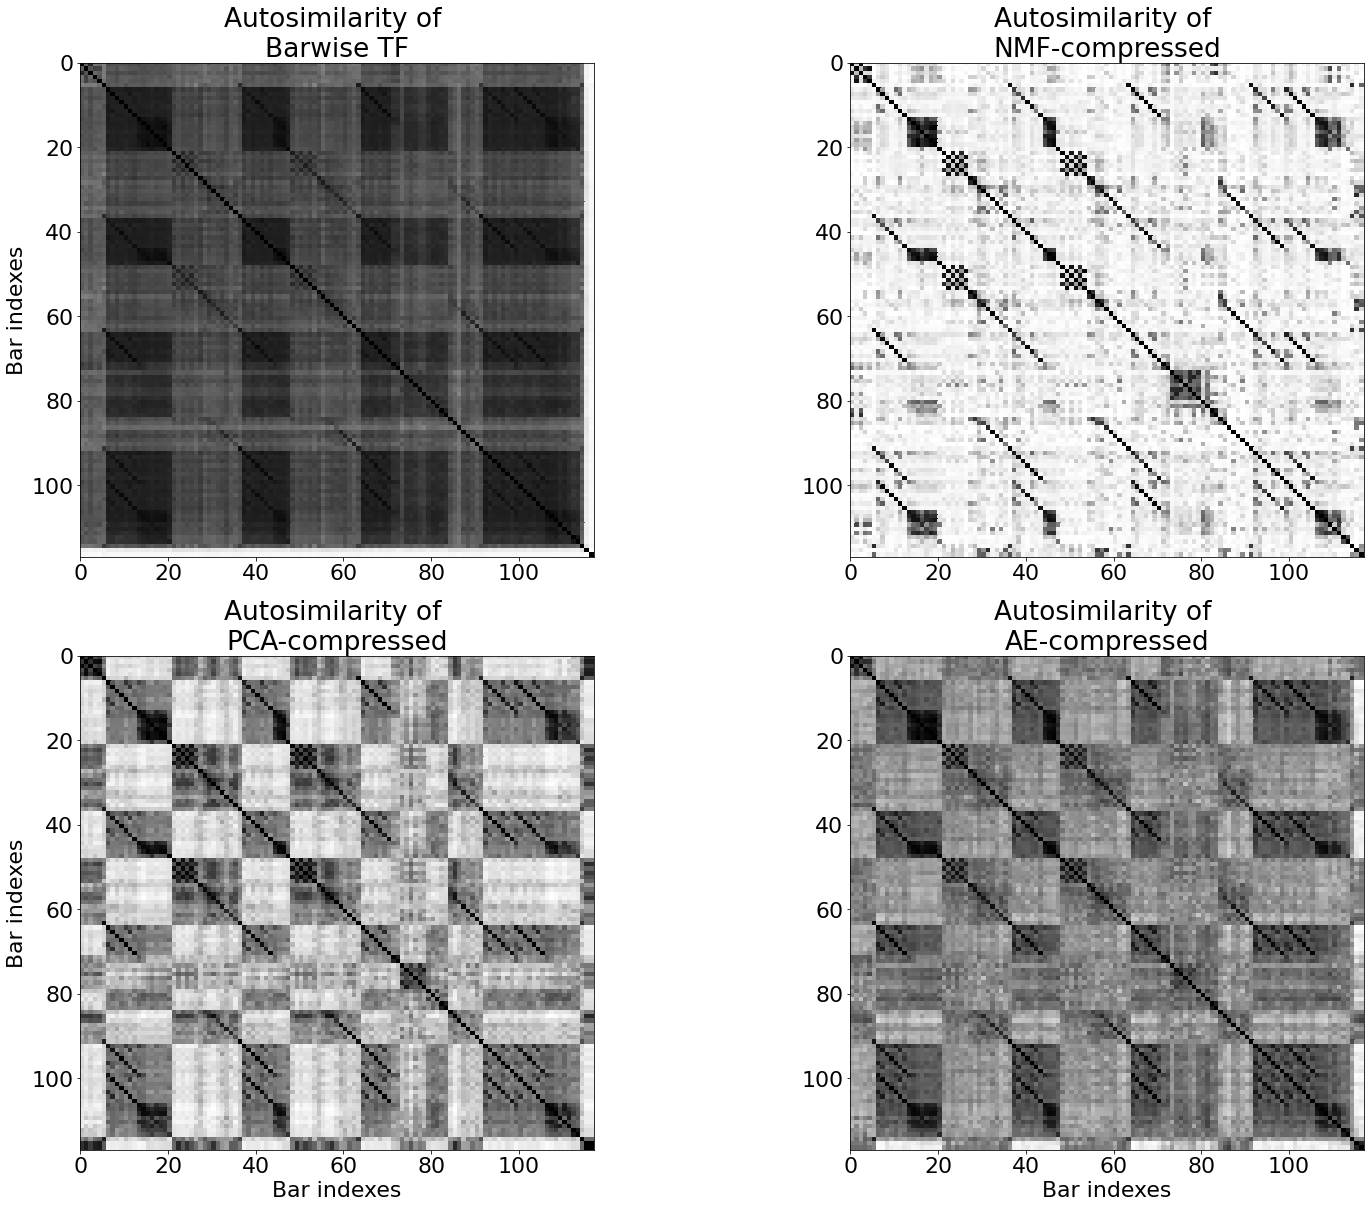

In [17]:
plt.rcParams.update({'font.size': 22})
plt.set_cmap(cm.Greys)

fig, axs = plt.subplots(2,2, figsize=(23,20))
autosimil_1 = as_seg.get_autosimilarity(tl.unfold(barwise_spectrogram, 0)[:-1], transpose = True, normalize = True)
padded_spec_1 = pad_factor(autosimil_1)
axs[0,0].pcolormesh(np.arange(padded_spec_1.shape[0]), np.arange(padded_spec_1.shape[0]), padded_spec_1)
axs[0,0].set_title('Autosimilarity of \nBarwise TF')
axs[0,0].set_ylabel('Bar indexes')
axs[0,0].invert_yaxis()

autosimil_2 = as_seg.get_autosimilarity(projection_pca[:-1], transpose = True, normalize = True)
padded_spec_2 = pad_factor(autosimil_2)
axs[1,0].pcolormesh(np.arange(padded_spec_2.shape[0]), np.arange(padded_spec_2.shape[0]), padded_spec_2)
axs[1,0].set_title('Autosimilarity of \nPCA-compressed')
axs[1,0].set_ylabel('Bar indexes')
axs[1,0].set_xlabel('Bar indexes')
axs[1,0].invert_yaxis()

autosimil_3 = as_seg.get_autosimilarity(projection_nmf[:-1], transpose = True, normalize = True)
padded_spec_3 = pad_factor(autosimil_3)
axs[0,1].pcolormesh(np.arange(padded_spec_3.shape[0]), np.arange(padded_spec_3.shape[0]), padded_spec_3)
axs[0,1].set_title('Autosimilarity of \nNMF-compressed')
axs[0,1].invert_yaxis()

autosimil_4 = as_seg.get_autosimilarity(projection_ae[:-1], transpose = True, normalize = True)
padded_spec_4 = pad_factor(autosimil_4)
axs[1,1].pcolormesh(np.arange(padded_spec_4.shape[0]), np.arange(padded_spec_4.shape[0]), padded_spec_4)
axs[1,1].set_title('Autosimilarity of \nAE-compressed')
axs[1,1].set_xlabel('Bar indexes')
axs[1,1].invert_yaxis()

for x in annotations_frontiers_barwise:
    if False:
        axs[0,0].plot([x,x], [0,padded_spec_1.shape[0] - 1], '-', linewidth=1, color = "silver")
        axs[0,0].plot([0,padded_spec_1.shape[0] - 1], [x,x], '-', linewidth=1, color = "silver")
        axs[0,1].plot([x,x], [0,padded_spec_1.shape[0] - 1], '-', linewidth=1, color = "black")
        axs[0,1].plot([0,padded_spec_1.shape[0] - 1], [x,x], '-', linewidth=1, color = "black")
        axs[1,0].plot([x,x], [0,padded_spec_1.shape[0] - 1], '-', linewidth=1, color = "black")
        axs[1,0].plot([0,padded_spec_1.shape[0] - 1], [x,x], '-', linewidth=1, color = "black")  
        axs[1,1].plot([x,x], [0,padded_spec_1.shape[0] - 1], '-', linewidth=1, color = "white")
        axs[1,1].plot([0,padded_spec_1.shape[0] - 1], [x,x], '-', linewidth=1, color = "white")
fig.subplots_adjust(wspace = 0.5)
#fig.savefig("C:/Users/amarmore/Desktop/Mes papiers/Publiés/SMC22/Barwise compression/Camera Ready/figs/autosimil_barcomp_24.pdf", bbox_inches = "tight")#, format='png')

plt.show()

<Figure size 432x288 with 0 Axes>

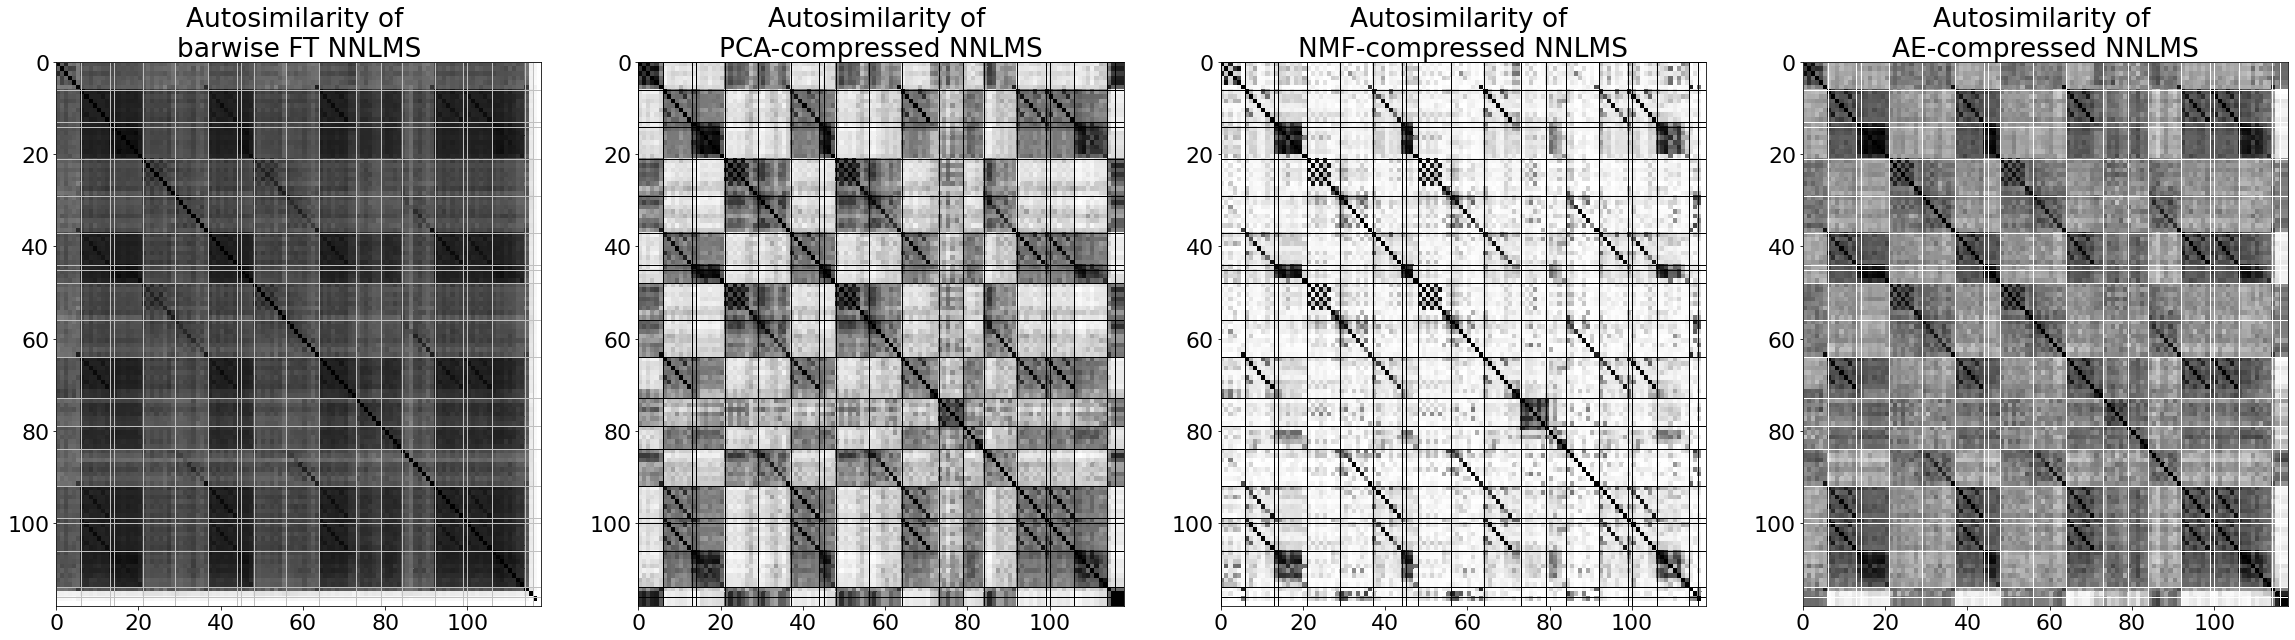

In [8]:
plt.rcParams.update({'font.size': 22})
plt.set_cmap(cm.Greys)

fig, axs = plt.subplots(1, 4, figsize=(40,10))
autosimil_1 = as_seg.get_autosimilarity(tl.unfold(barwise_spectrogram, 0), transpose = True, normalize = True)
padded_spec_1 = pad_factor(autosimil_1)
axs[0].pcolormesh(np.arange(padded_spec_1.shape[0]), np.arange(padded_spec_1.shape[0]), padded_spec_1)
axs[0].set_title('Autosimilarity of \nbarwise FT NNLMS')
axs[0].invert_yaxis()

autosimil_2 = as_seg.get_autosimilarity(projection_pca, transpose = True, normalize = True)
padded_spec_2 = pad_factor(autosimil_2)
axs[1].pcolormesh(np.arange(padded_spec_2.shape[0]), np.arange(padded_spec_2.shape[0]), padded_spec_2)
axs[1].set_title('Autosimilarity of \nPCA-compressed NNLMS')
axs[1].invert_yaxis()

autosimil_3 = as_seg.get_autosimilarity(projection_nmf, transpose = True, normalize = True)
padded_spec_3 = pad_factor(autosimil_3)
axs[2].pcolormesh(np.arange(padded_spec_3.shape[0]), np.arange(padded_spec_3.shape[0]), padded_spec_3)
axs[2].set_title('Autosimilarity of \nNMF-compressed NNLMS')
axs[2].invert_yaxis()

autosimil_4 = as_seg.get_autosimilarity(projection_ae, transpose = True, normalize = True)
padded_spec_4 = pad_factor(autosimil_4)
axs[3].pcolormesh(np.arange(padded_spec_4.shape[0]), np.arange(padded_spec_4.shape[0]), padded_spec_4)
axs[3].set_title('Autosimilarity of \nAE-compressed NNLMS')
axs[3].invert_yaxis()

for x in annotations_frontiers_barwise:
    axs[0].plot([x,x], [0,padded_spec_1.shape[0] - 1], '-', linewidth=1, color = "silver")
    axs[0].plot([0,padded_spec_1.shape[0] - 1], [x,x], '-', linewidth=1, color = "silver")
    axs[1].plot([x,x], [0,padded_spec_1.shape[0] - 1], '-', linewidth=1, color = "black")
    axs[1].plot([0,padded_spec_1.shape[0] - 1], [x,x], '-', linewidth=1, color = "black")
    axs[2].plot([x,x], [0,padded_spec_1.shape[0] - 1], '-', linewidth=1, color = "black")
    axs[2].plot([0,padded_spec_1.shape[0] - 1], [x,x], '-', linewidth=1, color = "black")  
    axs[3].plot([x,x], [0,padded_spec_1.shape[0] - 1], '-', linewidth=1, color = "white")
    axs[3].plot([0,padded_spec_1.shape[0] - 1], [x,x], '-', linewidth=1, color = "white")
    
fig.savefig("C:/Users/amarmore/Desktop/Mes papiers/Publiés/SMC22/Barwise compression/Camera Ready/figs/autosimil_barcomp_24.pdf", bbox_inches = "tight")#, format='png')

plt.show()

Number of segments: 1619


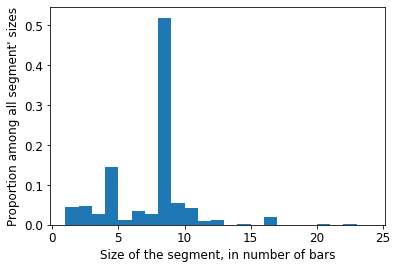

In [13]:
#MIREX10
annotations_folder = "{}/MIREX10".format(paths.path_annotation_rwc)
paths_dataset = scr.load_RWC_dataset(paths.path_entire_rwc, "MIREX10")
lengths = []
plt.rcParams.update({'font.size': 12})

for song_and_annotations in paths_dataset:
    song_number = song_and_annotations[0].replace(".wav","")
    annot_path = "{}/{}".format(annotations_folder, song_and_annotations[1])
    annotations = dm.get_segmentation_from_txt(annot_path, "MIREX10")
    bars = scr.load_or_save_bars(paths.path_data_persisted_rwc, "{}/{}.wav".format(paths.path_entire_rwc, song_number))
    barwise_annot = dm.frontiers_from_time_to_bar(np.array(annotations)[:,1], bars)
    for i in range(len(barwise_annot) - 1):
        lengths.append(barwise_annot[i+1] - barwise_annot[i])
print("Number of segments: {}".format(len(lengths)))
plt.hist(lengths, bins = range(1,25), density = True, cumulative = False)
plt.xlabel("Size of the segment, in number of bars")
plt.ylabel("Proportion among all segment' sizes")
#plt.title("Distribution histogram of segment' sizes\n in MIREX 10 annotations")
plt.savefig("C:/Users/amarmore/Desktop/Mes papiers/Publiés/SMC22/Barwise compression/Camera Ready/figs/segment_repartition_mirex10.pdf", bbox_inches = "tight")#, format='png')

plt.show()

Number of segments: 1611


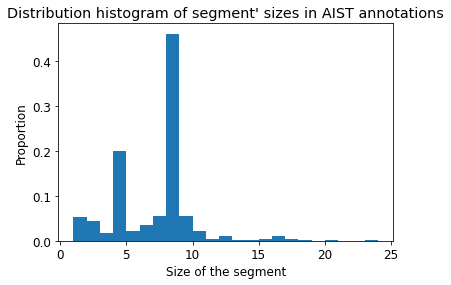

In [28]:
#AIST
annotations_folder = "{}/AIST".format(paths.path_annotation_rwc)
paths_dataset = scr.load_RWC_dataset(paths.path_entire_rwc, "AIST")
lengths = []

for song_and_annotations in paths_dataset:
    song_number = song_and_annotations[0].replace(".wav","")
    annot_path = "{}/{}".format(annotations_folder, song_and_annotations[1])
    annotations = dm.get_segmentation_from_txt(annot_path, "AIST")
    bars = scr.load_or_save_bars(paths.path_data_persisted_rwc, "{}/{}.wav".format(paths.path_entire_rwc, song_number))
    barwise_annot = dm.frontiers_from_time_to_bar(np.array(annotations)[:,1], bars)
    for i in range(len(barwise_annot) - 1):
        lengths.append(barwise_annot[i+1] - barwise_annot[i])
print("Number of segments: {}".format(len(lengths)))
plt.hist(lengths, bins = range(1,25), density = True, cumulative = False)
plt.xlabel("Size of the segment")
plt.ylabel("Proportion")
plt.title("Distribution histogram of segment' sizes in AIST annotations")
plt.show()

70 not found, normal ?
Number of segments: 9004


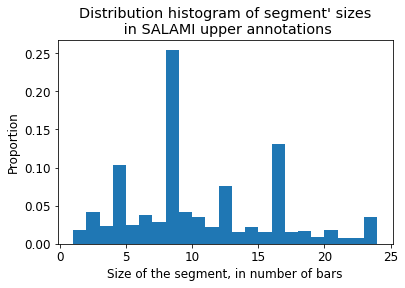

In [22]:
#SALAMI
import musicae.scripts.default_path as paths
import mirdata
plt.rcParams.update({'font.size': 12})

salami = mirdata.initialize('salami', data_home = paths.path_entire_salami)
len_salami = len(salami.track_ids)
fig, axs = plt.subplots(1, 1, figsize=(6, 3.75))


lengths = []

all_tracks = salami.load_tracks()

song_idx = 0

file_test_set_gs = open("C:/Users/amarmore/Desktop/Audio samples/Salami/test_set_grillschlut_salami_ids.txt")

test_dataset = []
for part in file_test_set_gs.readlines():
    if "mirex_name" not in part:
        line_broken = part.split("\t")
        test_dataset.append(int(line_broken[1]))

for key, track in all_tracks.items():
    if int(key) in test_dataset:
        try:
            bars = scr.load_or_save_bars(paths.path_data_persisted_salami, track.audio_path)
            ref_tab = []
            try:
                references_segments = salami.load_sections(track.sections_annotator1_uppercase_path).intervals
                ref_tab.append(references_segments)
                barwise_annot = dm.frontiers_from_time_to_bar(np.array(references_segments)[:,1], bars)
                for i in range(len(barwise_annot) - 1):
                    lengths.append(barwise_annot[i+1] - barwise_annot[i])

            except (TypeError, AttributeError):
                pass

            try:
                references_segments = salami.load_sections(track.sections_annotator2_uppercase_path).intervals
                ref_tab.append(references_segments)
                barwise_annot = dm.frontiers_from_time_to_bar(np.array(references_segments)[:,1], bars)
                for i in range(len(barwise_annot) - 1):
                    lengths.append(barwise_annot[i+1] - barwise_annot[i])
            except (TypeError, AttributeError):
                pass
            
        except FileNotFoundError:
            print(f"{key} not found, normal ?")
        

print("Number of segments: {}".format(len(lengths)))
axs.hist(lengths, bins = range(1,25), density = True, cumulative = False)
axs.set_xlabel("Size of the segment, in number of bars")
axs.set_ylabel("Proportion")
plt.title("Distribution histogram of segment' sizes\n in SALAMI upper annotations")
#fig.savefig("C:/Users/amarmore/Desktop/Mes papiers/figures/segment_repartition_mirex10.pdf", bbox_inches = "tight")#, format='png')

plt.show()


In [ ]:
stop

In [ ]:
res_beta2_features_zero_five = [[50.03, 52.34, 50.11, 50.55, 51.41],
                                [51.56, 50.89, 51.63, 51.55, 53.96], 
                                [51.02, 50.89, 52.69, 53.23, 53.25],
                                [55.72, 56.3, 59.93, 57.96, 58.84],
                                [44.02, 43.47, 44.66, 44.33, 42.74],
                                [57.56, 58.15, 60.19, 60.39, 60.87]]
res_beta2_features_three = [[69.14, 71.22, 70.84, 71.79, 71.96],
                            [73.93, 74.62, 75.4, 75.01, 75.96],
                            [72.17, 72.71, 73.35, 74.7, 74.66],
                            [77.19, 79.18, 79.85, 78.99, 79.34],
                            [65.77, 64.41, 66.2, 67.11, 65.27],
                            [75.4, 77.67, 79.34, 79.38, 80.08]]

res_beta1_features_zero_five = [[53.28, 55.17, 55.6, 55.48, 54.15],
                                [58.29, 57.03, 56.31, 55.41, 55.86],
                                [44.5, 42.66, 43.45, 42.16, 44.31],
                                [60.7, 61.9, 62.24, 62.73, 61.85]]
res_beta1_features_three = [[69.88, 72.55, 73.48, 74.02, 72.96],
                            [75.15, 75.6, 75.24, 74.45, 75.65],
                            [67.16, 64.71, 66.22, 65.32, 66.66],
                            [78.24, 78.76, 78.73, 79.79, 79.03]]

res_beta0_features_zero_five = [[35.34, 41.52, 39.01, 37.78, 38.02],
    [34.31, 35.76, 39.06, 40.08, 39.14],
    [38.22, 36.69, 37.93, 36.46, 38.1],
    [41.86, 40.73, 41.0, 41.17, 39.55]]

res_beta0_features_three = [[59.54, 63.91, 62.08, 61.14, 60.76],
    [58.1, 61.32, 63.71, 65.92, 64.78],
    [60.26, 61.01, 62.29, 59.92, 60.73],
    [64.3, 64.0, 63.89, 64.68, 62.76]]

best_dls_beta2 = []
for tab in res_beta2_features_zero_five:
    best_dls_beta2.append(list_dim_latent_space[np.argmax(tab)])

In [ ]:
def plot_curves(folder, beta = 2):
    annotations_mirex = f"{paths.path_annotation_rwc}/MIREX10"
    paths_mirex = scr.load_RWC_dataset(folder, "MIREX10")
    if beta == 2:
        features = ["pcp", "mfcc-nmfcc32", "mel_grill", "log_mel_grill", "padded_log_mel_grill", "minmax_log_mel_grill", "nn_log_mel_grill"]
        features_labels = ["Chromas", "MFCC", "Mel", "Log Mel", "Padded Log Mel", "Min Max Log Mel Grill", "Nonnegative Log Mel"]
    else:
        features = ["pcp", "mel_grill", "padded_log_mel_grill", "minmax_log_mel_grill", "nn_log_mel_grill"]
        features_labels = ["Chromas", "Mel", "Padded Log Mel", "Min Max Log Mel Grill", "Nonnegative Log Mel"]
    hop_length = 32
    hop_length_seconds = hop_length/44100
    subdivision_bars = 96
    n_epochs = 1000
    lr = 1e-3
    labels = None
    
    f_mes_zero_five = -1 * np.ones((len(paths_mirex), len(features), len(list_dim_latent_space), 1))
    f_mes_three = -1 * np.ones((len(paths_mirex), len(features),len(list_dim_latent_space), 1))
    for song_idx, song_and_annotations in enumerate(paths_mirex):
        song_name = song_and_annotations[0].replace(".wav","")
        #print(f"Current_song: {song_name}")
        annot_path_mirex = "{}/{}".format(annotations_mirex, song_and_annotations[1])

        annotations = dm.get_segmentation_from_txt(annot_path_mirex, "MIREX10")
        references_segments = np.array(annotations)[:,0:2]

        song_path = f"{folder}/{song_name}.wav"

        for idx_feature, feature in enumerate(features):
            spectrogram = scr.load_or_save_spectrogram(paths.path_data_persisted_rwc, song_path, feature, hop_length)
            freq_len = spectrogram.shape[0]

            bars = scr.load_or_save_bars(paths.path_data_persisted_rwc, song_path)

            tensor_barwise = nn_utils.tensorize_barwise(spectrogram, bars, hop_length_seconds, subdivision_bars)
            #vectorized_spec_dim = freq_len*subdivision_bars
            #nb_bars = tensor_barwise.shape[0]

            #simplet_data_loader, flatten_simplet_data_loader = cf.generate_simplet_dataloader(tensor_barwise)
            void_data_loader = None

            for index_latent, dim_latent_space in enumerate(list_dim_latent_space):

                projection_conv = load_or_save.load_or_save_conv(paths.path_data_persisted_rwc, song_name, void_data_loader, dim_latent_space, lr = lr, n_epochs = n_epochs, feature = feature, hop_length = hop_length, subdivision_bars = subdivision_bars, freq_len = freq_len, beta = beta, persist = False)
                projection_conv = np.where(abs(projection_conv) < 1e-15, 0, projection_conv)
                autosimilarity_conv = as_seg.get_autosimilarity(projection_conv, transpose = True, normalize = True)

                segments = as_seg.dynamic_convolution_computation(autosimilarity_conv, penalty_weight = 1, penalty_func = "modulo8", convolution_type = "mixed")[0]                
                segments_in_time = dm.segments_from_bar_to_time(segments, bars)

                f_mes_zero_five[song_idx, idx_feature, index_latent] = 100 * dm.compute_score_of_segmentation(references_segments, segments_in_time, window_length = 0.5)[2]
                f_mes_three[song_idx, idx_feature, index_latent] = 100 * dm.compute_score_of_segmentation(references_segments, segments_in_time, window_length = 3)[2]
                
    res_features_zero_five = []
    res_features_three = []

    for idx_feature, feature in enumerate(features):
        print(feature)
        res_features_zero_five.append([round(np.mean(f_mes_zero_five[:,idx_feature,i]), 2) for i in range(len(list_dim_latent_space))])
        res_features_three.append([round(np.mean(f_mes_three[:,idx_feature,i]), 2) for i in range(len(list_dim_latent_space))])
        print(res_features_zero_five[-1])
        print(res_features_three[-1])
        
    return res_features_zero_five, res_features_three
    
res_beta2_features_zero_five, res_beta2_features_three = plot_curves(paths.path_entire_rwc, beta = 2)
res_beta1_features_zero_five, res_beta1_features_three = plot_curves(paths.path_entire_rwc, beta = 1)
res_beta0_features_zero_five, res_beta0_features_three = plot_curves(paths.path_entire_rwc, beta = 0)

In [ ]:
best_dls_beta2

In [ ]:
def plot_heatmap(harvest, tol = 0.5, beta = 2):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 13}

    plt.rc('font', **font)
    if beta == 2:
        vegetables = ["Chromas", "MFCC", "Mel", "Log Mel", "Padded Log Mel", "Min Max Log Mel", "Nonnegative Log Mel"]
    else:
        vegetables = ["Chromas", "Mel", "Padded Log Mel", "Min Max Log Mel", "Nonnegative Log Mel"]

    farmers = list_dim_latent_space

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(harvest, cmap = cm.Greys)
    if tol == 0.5:
        im.set_clim(np.amin(harvest)/2,70)#np.amax(harvest))
    elif tol == 3:
        im.set_clim(50,np.amax(harvest) + 5)
        #im.set_clim(np.amin(harvest),100)


    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(farmers)))
    ax.set_xticklabels(farmers)
    ax.set_yticks(np.arange(len(vegetables)))
    ax.set_yticklabels(vegetables)
    ax.set_xlabel("Latent space dimension")


    # Rotate the tick labels and set their alignment.
    # plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             # rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(vegetables)):
        for j in range(len(farmers)):
            text = ax.text(j, i, f"{harvest[i, j]}%",
                           ha="center", va="center", color="w")

    ax.set_title(f"Segmentation score (with {tol}s tolerance)\non RWC Pop\naccording to different features\nand different latent space dimensions\nbeta = {beta}")
    fig.tight_layout()
    
    plt.show()
    
plot_heatmap(np.array(res_beta2_features_zero_five), tol = 0.5, beta = 2)#, features_labels)
plot_heatmap(np.array(res_beta2_features_three), tol = 3, beta = 2)

plot_heatmap(np.array(res_beta1_features_zero_five), tol = 0.5, beta = 1)#, features_labels)
plot_heatmap(np.array(res_beta1_features_three), tol = 3, beta = 1)

plot_heatmap(np.array(res_beta0_features_zero_five), tol = 0.5, beta= 0)#, features_labels)
plot_heatmap(np.array(res_beta0_features_three), tol = 3, beta= 0)

In [ ]:
import pandas as pd
import plotly.express as px
df = px.data.tips()
fig = px.box(df, x="time", y="total_bill", points="all")
fig.show()

In [ ]:
#scr_AE.visualize_autosimil_article(path_subset_RWC_wav)